In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# directories and data
data_directory = "/home/edgar/astropology/data/agn_lcs/"
lc_directory = f"{data_directory}/lcs"

w_distances = np.load(
    f"{data_directory}/agn_wasserstein_40736_series.npy",
    mmap_mode="r" 
)
objectid_w = np.load(
    f"{data_directory}/objid_agn_wasserstein_40736_series.npy",
    mmap_mode="r"
).astype(int)

In [3]:
w_score = np.empty(w_distances.shape[0])

for idx, score in enumerate(w_distances):

    w_score[idx] = np.nanmean(score)

w_score *= 1/np.max(w_score)
w_rank = np.argsort(w_score)
ranked_objectid = objectid_w[w_rank]

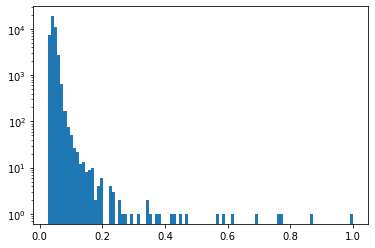

In [4]:
_ = plt.hist(w_score, bins=100)
plt.yscale("log")

In [5]:
cadence = np.empty((w_score.size, 2))

for idx, objectid in enumerate(objectid_w):

    lc = np.loadtxt(f"{lc_directory}/{objectid}.dat")

    cadence[idx, 0] = lc.shape[0]
    cadence[idx, 1] = w_score[idx]

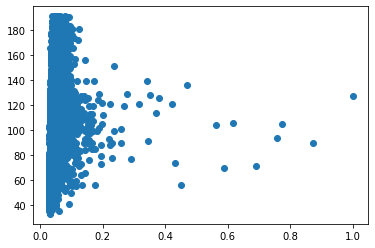

In [21]:
plt.scatter(cadence[:, 1], cadence[:, 0])
# plt.hlines(
#     xmin=cadence[:, 0].min(),
#     xmax=cadence[:, 0].max(),
#     y=[0.15, 0.45],
#     color="black"
# )

# _ = plt.hist2d(
#     cadence[:, 1], cadence[:, 0],
#     bins=100,
#     cmap="gray_r"
# )
# plt.xlim(0.02, 0.2)
# plt.colorbar()

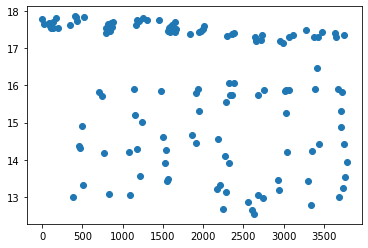

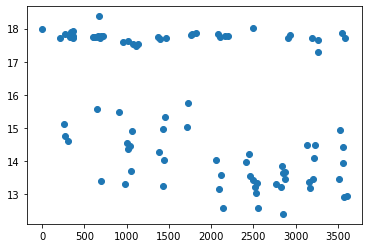

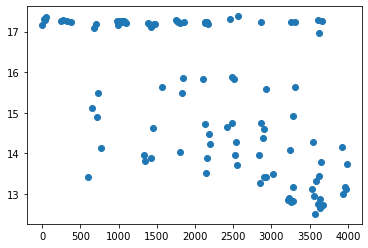

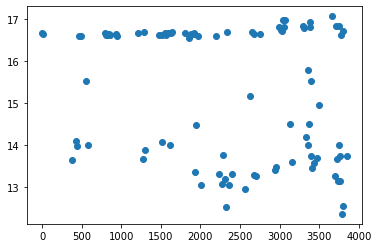

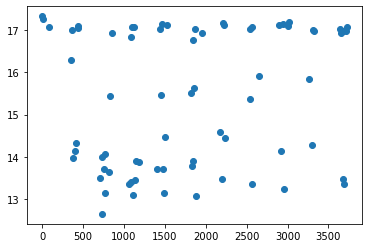

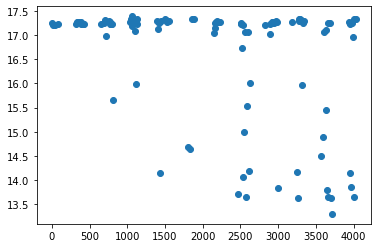

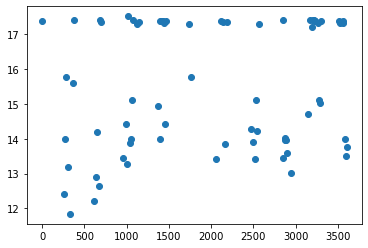

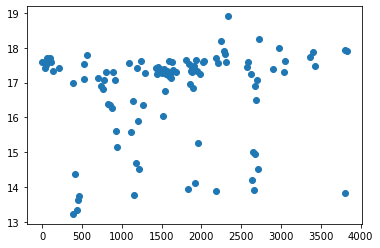

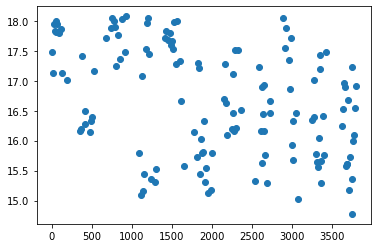

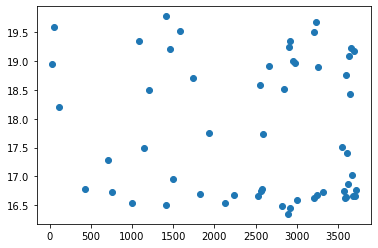

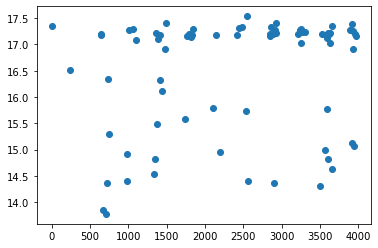

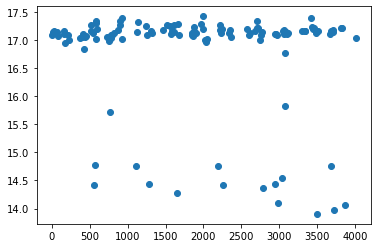

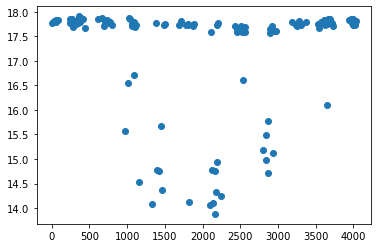

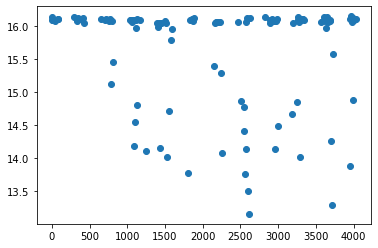

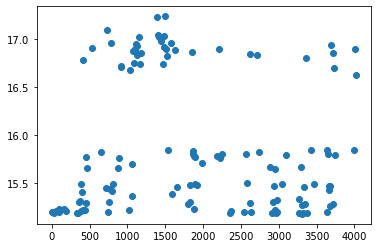

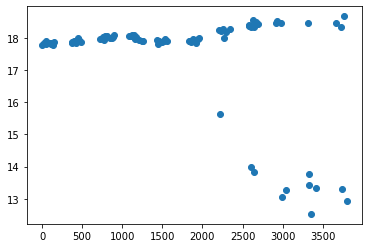

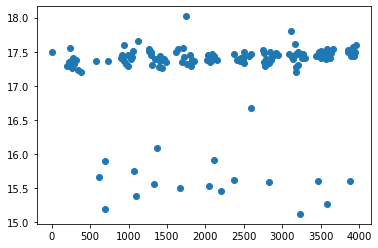

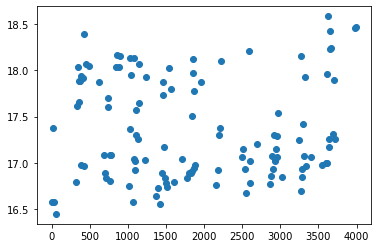

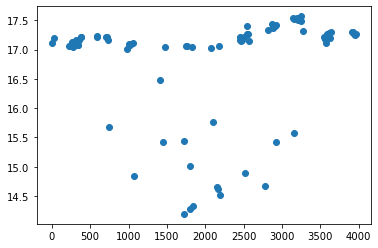

In [47]:
# rank = -5

for rank in range(1, 20):
    rank *= -1
    lc = np.loadtxt(f"{lc_directory}/{ranked_objectid[rank]}.dat")

    plt.clf()
    mjd = lc[:, 0]
    mag = lc[:, 1]
    error_mag = lc[:, 2]

    plt.scatter(mjd, mag)
    plt.show()